In [1]:
%run StatTest2_WithSimulation_Setup.ipynb

{0: ['ME', 'IL', 'PA', 'GA', 'OK', 'DE', 'WA', 'CT', 'OH', 'VA', 'NE', 'MT', 'IN', 'CA', 'HI', 'ND', 'MD', 'SC', 'RI', 'AK', 'KY', 'WI', 'LA', 'MN', 'MS', 'WV', 'FL'], 1: ['SD', 'IL', 'PA', 'NH', 'NM', 'NV', 'OK', 'UT', 'CT', 'OH', 'VA', 'OR', 'CO', 'IN', 'HI', 'AL', 'RI', 'AK', 'LA', 'MN', 'IA', 'AR', 'WV'], 2: ['MI', 'ME', 'WY', 'DC', 'TX', 'AZ', 'NC', 'WA', 'OR', 'CO', 'MT', 'ND', 'TN', 'SC', 'AL', 'NY', 'KY', 'NJ', 'KS', 'ID', 'IA', 'AR', 'MO'], 3: ['MI', 'SD', 'WY', 'NH', 'DC', 'TX', 'GA', 'AZ', 'NM', 'NC', 'NV', 'DE', 'UT', 'NE', 'CA', 'MD', 'TN', 'NY', 'NJ', 'KS', 'WI', 'ID', 'MS', 'FL', 'MO']}
{0: ['MI', 'SD', 'WY', 'NH', 'DC', 'TX', 'AZ', 'NM', 'NC', 'NV', 'UT', 'OR', 'CO', 'TN', 'AL', 'NY', 'NJ', 'KS', 'ID', 'IA', 'AR', 'MO'], 1: ['MI', 'ME', 'WY', 'DC', 'TX', 'GA', 'AZ', 'NC', 'DE', 'WA', 'NE', 'MT', 'CA', 'ND', 'MD', 'TN', 'SC', 'NY', 'KY', 'NJ', 'KS', 'WI', 'ID', 'MS', 'FL', 'MO'], 2: ['SD', 'IL', 'PA', 'NH', 'GA', 'NM', 'NV', 'OK', 'DE', 'UT', 'CT', 'OH', 'VA', 'NE', 'IN'

In [2]:
data2014 = pd.read_csv("Our_Dataset/2014dataset.csv")
data2015 = pd.read_csv("Our_Dataset/2015dataset.csv")
data2016 = pd.read_csv("Our_Dataset/2016dataset.csv")
data2017 = pd.read_csv("Our_Dataset/2017dataset.csv")

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2,52,323,649,882,932,1092,1202) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2,57,204,341,376,377,396,430,431,928,944,1006,1013,1151,1160,1169,1179,1411) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2,17,163,355,406,702,835,847,1083,1156,1183,1185,1200) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Create the labels.
# By index:
# label 2 is transfers
# label 3 is premiums
# label 4 is costs
# label 5 is member months
# label 6 is reinsurance (individual group only)

ind_labels_14 = ["HIOS ID", "HIOS INPUTTED INSURANCE COMPANY NAME",
                  "HHS RISK ADJUSTMENT TRANSFER AMOUNT (INDIVIDUAL MARKET, INCLUDING CATASTROPHIC)",
                  "1.1Directpremiumwritten2HealthInsuranceINDIVIDUALTotalasof3/31/15",
                  "2.16Totalincurredclaims2HealthInsuranceINDIVIDUALTotalasof3/31/15",
                  "7.4Membermonths2HealthInsuranceINDIVIDUALTotalasof3/31/15",
                  "STATE", "REINSURANCE PAYMENT AMOUNT (OR NOT ELIGIBLE)"] # no more reinsurance as of 2017
ind_labels_15 = [label.replace('15', '16') for label in ind_labels_14]
ind_labels_16 = [label.replace('15', '17') for label in ind_labels_14]
ind_labels_17 = [label.replace('15', '18') for label in ind_labels_14][:-1]

sg_labels_14 = ["HIOS ID", "HIOS INPUTTED INSURANCE COMPANY NAME",
                 "HHS RISK ADJUSTMENT TRANSFERS AMOUNT (SMALL GROUP MARKET)",
                  "1.1Directpremiumwritten7HealthInsuranceSMALLGROUPTotalasof3/31/15",
                  "2.16Totalincurredclaims7HealthInsuranceSMALLGROUPTotalasof3/31/15",
                  "7.4Membermonths7HealthInsuranceSMALLGROUPTotalasof3/31/15", "STATE"]
sg_labels_15 = [label.replace('15', '16') for label in sg_labels_14]
sg_labels_16 = [label.replace('15', '17') for label in sg_labels_14]
sg_labels_17 = [label.replace('15', '18') for label in sg_labels_14]

In [4]:
# Filter the data to include only the fields we want

ind_data_14 = data2014[ind_labels_14].dropna()
ind_data_15 = data2015[ind_labels_15].dropna()
ind_data_16 = data2016[ind_labels_16].dropna()
ind_data_17 = data2017[ind_labels_17].dropna()
sg_data_14 = data2014[sg_labels_14].dropna()
sg_data_15 = data2015[sg_labels_15].dropna()
sg_data_16 = data2016[sg_labels_16].dropna()
sg_data_17 = data2017[sg_labels_17].dropna()

In [5]:
# Drop companies with <2000 MM
ind_data_14 = ind_data_14.where(ind_data_14[ind_labels_14[5]] > 2000).dropna()
ind_data_15 = ind_data_15.where(ind_data_15[ind_labels_15[5]] > 2000).dropna()
ind_data_16 = ind_data_16.where(ind_data_16[ind_labels_16[5]] > 2000).dropna()
ind_data_17 = ind_data_17.where(ind_data_17[ind_labels_17[5]] > 2000).dropna()
sg_data_14 = sg_data_14.where(sg_data_14[sg_labels_14[5]] > 2000).dropna()
sg_data_15 = sg_data_15.where(sg_data_15[sg_labels_15[5]] > 2000).dropna()
sg_data_16 = sg_data_16.where(sg_data_16[sg_labels_16[5]] > 2000).dropna()
sg_data_17 = sg_data_17.where(sg_data_17[sg_labels_17[5]] > 2000).dropna()

In [6]:
# Calculate transfers, premiums, costs, and reinsurance (if individual group) per member month
def calculate_pmm(df, df_labels, group):
    df["MM"] = df[df_labels[5]]
    df["Transfers"] = df[df_labels[2]]
    df["TotalCosts"] = abs(df[df_labels[4]])
    df["Enrollees"] = df["MM"] / 12
    df["TransfersPerEnrollee"] = df["Transfers"] / df["Enrollees"]
    df["TransfersPerSqrtEnrollee"] = df["Transfers"] / np.sqrt(df["Enrollees"])
    df["LogEnrollees"] = np.log(df["Enrollees"])
    df["LogTransfers"] = np.log(df["Transfers"]**2 + 1)
    df["TransfersPMM"] = df[df_labels[2]] / df[df_labels[5]]
    df["PremiumsPMM"] = abs(df[df_labels[3]] / df[df_labels[5]])
    df["CostsPMM"] = abs(df[df_labels[4]] / df[df_labels[5]])
    if group == "i":
        df["ReinsurancePMM"] = df[df_labels[7]] / df[df_labels[5]]
        df["ProfitsPMM"] = df["PremiumsPMM"] - df["CostsPMM"] + df["TransfersPMM"] + df["ReinsurancePMM"]
        #df["PremMinusCostsPlusReinsurancePMM"] = df["PremiumsPMM"] - df["CostsPMM"] + df["ReinsurancePMM"]
    elif group == "sg":
        df["ProfitsPMM"] = df["PremiumsPMM"] - df["CostsPMM"] + df["TransfersPMM"]
    df["PremMinusCostsPMM"] = df["PremiumsPMM"] - df["CostsPMM"]
    df["PremMinusCostsPlusTransfersPMM"] = df["PremiumsPMM"] - df["CostsPMM"] + df["TransfersPMM"]
    df["SicknessPMM"] = df["CostsPMM"] - df["PremiumsPMM"]
    average_sickness = np.mean(df["SicknessPMM"])
    df["ExcessSicknessPMM"] = df["SicknessPMM"] - average_sickness
    return df

ind_data_14 = calculate_pmm(ind_data_14, ind_labels_14, "i")
ind_data_15 = calculate_pmm(ind_data_15, ind_labels_15, "i")
ind_data_16 = calculate_pmm(ind_data_16, ind_labels_16, "i")
ind_data_17 = calculate_pmm(ind_data_17, ind_labels_17, "sg")
sg_data_14 = calculate_pmm(sg_data_14, sg_labels_14, "sg")
sg_data_15 = calculate_pmm(sg_data_15, sg_labels_15, "sg")
sg_data_16 = calculate_pmm(sg_data_16, sg_labels_16, "sg")
sg_data_17 = calculate_pmm(sg_data_17, sg_labels_17, "sg")

In [7]:
# Combine the dataframes by left merging

ind_data = ind_data_14.merge(ind_data_15, on='HIOS ID', how='outer', suffixes=('_14', '_15'))\
.merge(ind_data_16, on='HIOS ID', how='outer').merge(ind_data_17, on='HIOS ID', how='outer', suffixes=('_16', '_17'))

In [8]:
# Do the same thing for small group

sg_data = sg_data_14.merge(sg_data_15, on='HIOS ID', how='outer', suffixes=('_14', '_15'))\
.merge(sg_data_16, on='HIOS ID', how='outer').merge(sg_data_17, on='HIOS ID', how='outer', suffixes=('_16', '_17'))

In [9]:
states = ["PA", "WI", "OR", "NV", "FL", "VA", "NY", "AZ", "GA", "CO",
          "MI", "ME", "CA", "MO", "OH", "NM", "CT", "MA", "NE", "HI",
          "MN", "AR", "NJ", "MD", "WA", "UT"]
state_label = "Competitive States"
dfs = [sg_data_14, sg_data_15, sg_data_16, sg_data_17]

In [10]:
dfs_new = normalize_empirical_data_to_avg_2017_dollars(dfs, states)

Cbar is 4398.953
PA 14 Ratio is 1.105
WI 14 Ratio is 1.127
OR 14 Ratio is 1.208
NV 14 Ratio is 1.365
FL 14 Ratio is 1.199
VA 14 Ratio is 1.250
NY 14 Ratio is 0.973
AZ 14 Ratio is 1.497
GA 14 Ratio is 1.260
CO 14 Ratio is 1.203
MI 14 Ratio is 1.308
ME 14 Ratio is 1.188
CA 14 Ratio is 1.154
MO 14 Ratio is 1.414
OH 14 Ratio is 1.264
NM 14 Ratio is 1.142
CT 14 Ratio is 0.990
NE 14 Ratio is 1.265
HI 14 Ratio is 1.175
MN 14 Ratio is 1.182
AR 14 Ratio is 1.473
NJ 14 Ratio is 1.173
MD 14 Ratio is 1.238
WA 14 Ratio is 1.199
UT 14 Ratio is 1.628
PA 15 Ratio is 1.072
WI 15 Ratio is 1.099
OR 15 Ratio is 1.138
NV 15 Ratio is 1.302
FL 15 Ratio is 1.162
VA 15 Ratio is 1.269
NY 15 Ratio is 0.896
AZ 15 Ratio is 1.404
GA 15 Ratio is 1.199
CO 15 Ratio is 1.185
MI 15 Ratio is 1.250
ME 15 Ratio is 1.184
CA 15 Ratio is 1.117
MO 15 Ratio is 1.282
OH 15 Ratio is 1.191
NM 15 Ratio is 1.108
CT 15 Ratio is 0.977
NE 15 Ratio is 1.189
HI 15 Ratio is 1.086
MN 15 Ratio is 1.156
AR 15 Ratio is 1.407
NJ 15 Ratio is 1.

In [11]:
for df_temp in dfs_new:
    df_temp["TransfersNormalizedPerSqrtEnrollee"] = df_temp["TransfersNormalized"] / np.sqrt(df_temp["Enrollees"])

In [12]:
#dfs_new[3][["TransfersPerSqrtEnrollee", "TransfersNormalizedPerSqrtEnrollee"]]

In [13]:
df2 = create_df2(states, dfs_new, "TransfersNormalizedPerSqrtEnrollee")


In [14]:
k = len(df2)
v = np.linspace(0, max(abs(df2)), 10000)
v = v[1:len(v)]

ratios = [ratio_list(df2, vi) for vi in v]
#print(ratios)
begin_p = 5/k
end_p = 1-begin_p
start_index = 0
end_index = 0
for index, ratio2 in enumerate(ratios):
    if ratio2 >= begin_p:
        start_index = index
        break
    
for index, ratio2 in enumerate(ratios):
    if ratio2 > end_p:
        end_index = index
        break

if end_index == 0:
    end_index = len(v) - 1
    
v = v[start_index:end_index]

ratios2 = ratios[start_index:end_index]
multiplier = [np.sqrt(2)/vi for vi in v]
#plt.plot(v, ratios2)
#plt.plot(v, multiplier)

In [15]:
y = [multiplier[i] * special.erfinv(ratio2) for i, ratio2 in enumerate(ratios2)]
#plt.plot(v, y)
#plt.title("1/beta vs. v")
beta = [1/yi for yi in y]
#plt.plot(v, beta)
#plt.axvline(x=64432.69, color='r', linestyle='--', label="Point of max difference")
#plt.title("beta vs. v")

In [16]:
# Finding the minimum beta
# Whenever we reject a beta, we reject all betas greater than that,
# so keep pushing beta smaller until we reach max_difference == test_statistic
# Run test for larger data sizes (combining states, years)

In [17]:
max_beta=max(beta)
max_beta = int(max_beta/100)*100

beta = 120900.000


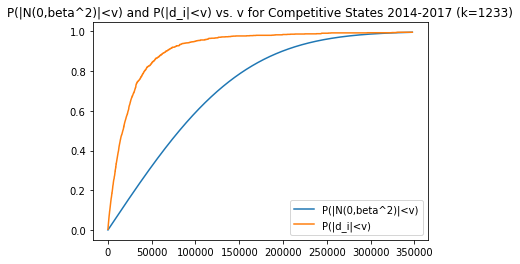

In [18]:
theoretical = [special.erf(vi/(max_beta*np.sqrt(2))) for vi in v]

plt.plot(v, theoretical, label="P(|N(0,beta^2)|<v)")
plt.plot(v, ratios2, label="P(|d_i|<v)")
plt.title("P(|N(0,beta^2)|<v) and P(|d_i|<v) vs. v for %s 2014-2017 (k=%d)" % (state_label, len(df2)))
#plt.axvline(x=64432.69, color='r', linestyle='--', label="Point of max difference")
plt.legend()
print("beta = %.3f" % (max_beta))

In [19]:
beta_theoretical, Mb_index = run_test_against_theoretical(df2, max_beta, ratios2, False)

k = 1233
test_stat at this k = 0.03472

At the point of maximum difference with beta = 120900:
P(|d_i|<v) = 0.8191
P(|N(0,max_beta^2)|<v) = 0.2871
Difference = 0.5321




At the point of maximum difference with beta = 110900:
P(|d_i|<v) = 0.8013
P(|N(0,max_beta^2)|<v) = 0.2927
Difference = 0.5085




At the point of maximum difference with beta = 100900:
P(|d_i|<v) = 0.7397
P(|N(0,max_beta^2)|<v) = 0.2549
Difference = 0.4848




At the point of maximum difference with beta = 90900:
P(|d_i|<v) = 0.7397
P(|N(0,max_beta^2)|<v) = 0.2818
Difference = 0.4579




At the point of maximum difference with beta = 80900:
P(|d_i|<v) = 0.7397
P(|N(0,max_beta^2)|<v) = 0.3148
Difference = 0.4248




At the point of maximum difference with beta = 70900:
P(|d_i|<v) = 0.7397
P(|N(0,max_beta^2)|<v) = 0.3563
Difference = 0.3833




At the point of maximum difference with beta = 60900:
P(|d_i|<v) = 0.7397
P(|N(0,max_beta^2)|<v) = 0.4098
Difference = 0.3299




At the point of maximum difference with beta = 


At the point of maximum difference with beta = 25500:
P(|d_i|<v) = 0.2498
P(|N(0,max_beta^2)|<v) = 0.2023
Difference = 0.0475




At the point of maximum difference with beta = 25400:
P(|d_i|<v) = 0.2198
P(|N(0,max_beta^2)|<v) = 0.1731
Difference = 0.0467




At the point of maximum difference with beta = 25300:
P(|d_i|<v) = 0.2198
P(|N(0,max_beta^2)|<v) = 0.1737
Difference = 0.0461




At the point of maximum difference with beta = 25200:
P(|d_i|<v) = 0.2198
P(|N(0,max_beta^2)|<v) = 0.1744
Difference = 0.0454




At the point of maximum difference with beta = 25100:
P(|d_i|<v) = 0.2198
P(|N(0,max_beta^2)|<v) = 0.1751
Difference = 0.0447




At the point of maximum difference with beta = 25000:
P(|d_i|<v) = 0.2198
P(|N(0,max_beta^2)|<v) = 0.1758
Difference = 0.0440




At the point of maximum difference with beta = 24900:
P(|d_i|<v) = 0.2198
P(|N(0,max_beta^2)|<v) = 0.1765
Difference = 0.0433




At the point of maximum difference with beta = 24800:
P(|d_i|<v) = 0.2198
P(|N(0,max_beta

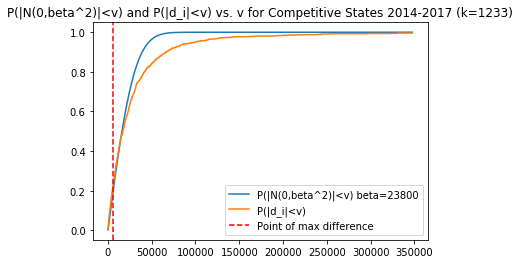

In [20]:
beta_theoretical = beta_theoretical+100

theoretical = [special.erf(vi/(beta_theoretical*np.sqrt(2))) for vi in v]

plt.plot(v, theoretical, label="P(|N(0,beta^2)|<v) beta=%d" % (beta_theoretical))
plt.plot(v, ratios2, label="P(|d_i|<v)")
plt.title("P(|N(0,beta^2)|<v) and P(|d_i|<v) vs. v for %s 2014-2017 (k=%d)" % (state_label, len(df2)))
plt.axvline(x=v[Mb_index], color='r', linestyle='--', label="Point of max difference")
plt.legend()
#plt.xlim(0, 50000)
#print("beta = %.3f" % (max_beta))

In [21]:
print("Theoretical Test Results")
run_binom_stat_test2(beta_theoretical, df2.values)

Theoretical Test Results
Beta (=std): 23800
Number of T/sqrt(n) above 2 stds: 212
Proportion of T/sqrt(n) above 2 stds: 0.172
P value = 0.000000


In [22]:
ratios_c, _ = create_simulation_adjust_for_imbalances(states, dfs_new, beta_theoretical - 10000)
ratios_c2, _ = create_simulation_adjust_for_imbalances(states, dfs_new, beta_theoretical)
ratios_c3, _ = create_simulation_adjust_for_imbalances(states, dfs_new, beta_theoretical + 10000)

Sum sqrt(a) = 147470.821
Sum sqrt(a) = 147470.821
Sum sqrt(a) = 147470.821


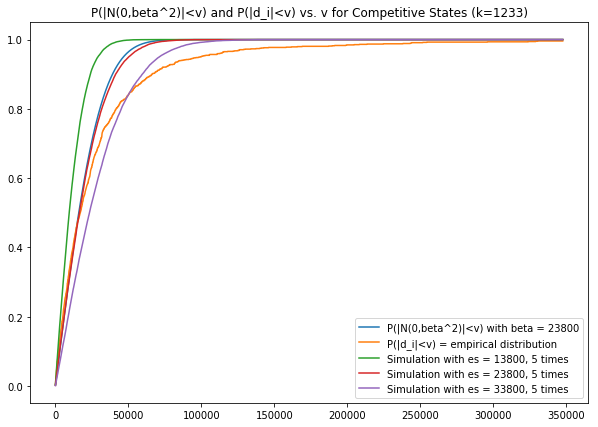

In [23]:
theoretical = [special.erf(vi/(beta_theoretical*np.sqrt(2))) for vi in v]

plt.figure(figsize=(10, 7))
plt.plot(v, theoretical, label="P(|N(0,beta^2)|<v) with beta = %d" % (beta_theoretical))
plt.plot(v, ratios2, label="P(|d_i|<v) = empirical distribution")
plt.plot(v, ratios_c, label="Simulation with es = %d, 5 times" % (beta_theoretical - 10000))
plt.plot(v, ratios_c2, label="Simulation with es = %d, 5 times" % (beta_theoretical))
plt.plot(v, ratios_c3, label="Simulation with es = %d, 5 times" % (beta_theoretical + 10000))
plt.title("P(|N(0,beta^2)|<v) and P(|d_i|<v) vs. v for %s (k=%d)" % (state_label, len(df2)))
plt.legend()

In [24]:
beta_sims = list()

for i in range(5):
    beta_sim, _= run_test_against_simulation(states, dfs_new, beta_theoretical, ratios2, False)
    beta_sims.append(beta_sim)

k = 1233
test_stat at this k = 0.03472

At the point of maximum difference with beta = 27800:
P(|d_i|<v) = 0.4250
P(|N(0,max_beta^2)|<v) = 0.3292
Difference = 0.0958




At the point of maximum difference with beta = 27700:
P(|d_i|<v) = 0.4558
P(|N(0,max_beta^2)|<v) = 0.3738
Difference = 0.0820




At the point of maximum difference with beta = 27600:
P(|d_i|<v) = 0.3828
P(|N(0,max_beta^2)|<v) = 0.2933
Difference = 0.0895




At the point of maximum difference with beta = 27500:
P(|d_i|<v) = 0.4250
P(|N(0,max_beta^2)|<v) = 0.3357
Difference = 0.0893




At the point of maximum difference with beta = 27400:
P(|d_i|<v) = 0.3812
P(|N(0,max_beta^2)|<v) = 0.2948
Difference = 0.0864




At the point of maximum difference with beta = 27300:
P(|d_i|<v) = 0.4501
P(|N(0,max_beta^2)|<v) = 0.3646
Difference = 0.0855




At the point of maximum difference with beta = 27200:
P(|d_i|<v) = 0.3763
P(|N(0,max_beta^2)|<v) = 0.2911
Difference = 0.0852




At the point of maximum difference with beta = 271


At the point of maximum difference with beta = 27300:
P(|d_i|<v) = 0.4250
P(|N(0,max_beta^2)|<v) = 0.3341
Difference = 0.0909




At the point of maximum difference with beta = 27200:
P(|d_i|<v) = 0.4517
P(|N(0,max_beta^2)|<v) = 0.3682
Difference = 0.0835




At the point of maximum difference with beta = 27100:
P(|d_i|<v) = 0.4501
P(|N(0,max_beta^2)|<v) = 0.3656
Difference = 0.0846




At the point of maximum difference with beta = 27000:
P(|d_i|<v) = 0.3828
P(|N(0,max_beta^2)|<v) = 0.3057
Difference = 0.0772




At the point of maximum difference with beta = 26900:
P(|d_i|<v) = 0.4250
P(|N(0,max_beta^2)|<v) = 0.3447
Difference = 0.0802




At the point of maximum difference with beta = 26800:
P(|d_i|<v) = 0.3828
P(|N(0,max_beta^2)|<v) = 0.3044
Difference = 0.0785




At the point of maximum difference with beta = 26700:
P(|d_i|<v) = 0.4250
P(|N(0,max_beta^2)|<v) = 0.3527
Difference = 0.0722




At the point of maximum difference with beta = 26600:
P(|d_i|<v) = 0.4250
P(|N(0,max_beta


At the point of maximum difference with beta = 26300:
P(|d_i|<v) = 0.4250
P(|N(0,max_beta^2)|<v) = 0.3501
Difference = 0.0749




At the point of maximum difference with beta = 26200:
P(|d_i|<v) = 0.3333
P(|N(0,max_beta^2)|<v) = 0.2656
Difference = 0.0677




At the point of maximum difference with beta = 26100:
P(|d_i|<v) = 0.3828
P(|N(0,max_beta^2)|<v) = 0.3087
Difference = 0.0741




At the point of maximum difference with beta = 26000:
P(|d_i|<v) = 0.3828
P(|N(0,max_beta^2)|<v) = 0.3078
Difference = 0.0750




At the point of maximum difference with beta = 25900:
P(|d_i|<v) = 0.3812
P(|N(0,max_beta^2)|<v) = 0.3068
Difference = 0.0743




At the point of maximum difference with beta = 25800:
P(|d_i|<v) = 0.3333
P(|N(0,max_beta^2)|<v) = 0.2596
Difference = 0.0737




At the point of maximum difference with beta = 25700:
P(|d_i|<v) = 0.3828
P(|N(0,max_beta^2)|<v) = 0.3108
Difference = 0.0720




At the point of maximum difference with beta = 25600:
P(|d_i|<v) = 0.3333
P(|N(0,max_beta


At the point of maximum difference with beta = 25500:
P(|d_i|<v) = 0.3828
P(|N(0,max_beta^2)|<v) = 0.3246
Difference = 0.0582




At the point of maximum difference with beta = 25400:
P(|d_i|<v) = 0.3333
P(|N(0,max_beta^2)|<v) = 0.2690
Difference = 0.0643




At the point of maximum difference with beta = 25300:
P(|d_i|<v) = 0.3333
P(|N(0,max_beta^2)|<v) = 0.2641
Difference = 0.0693




At the point of maximum difference with beta = 25200:
P(|d_i|<v) = 0.3333
P(|N(0,max_beta^2)|<v) = 0.2751
Difference = 0.0582




At the point of maximum difference with beta = 25100:
P(|d_i|<v) = 0.3779
P(|N(0,max_beta^2)|<v) = 0.3153
Difference = 0.0626




At the point of maximum difference with beta = 25000:
P(|d_i|<v) = 0.3333
P(|N(0,max_beta^2)|<v) = 0.2779
Difference = 0.0555




At the point of maximum difference with beta = 24900:
P(|d_i|<v) = 0.3333
P(|N(0,max_beta^2)|<v) = 0.2722
Difference = 0.0611




At the point of maximum difference with beta = 24800:
P(|d_i|<v) = 0.2498
P(|N(0,max_beta


At the point of maximum difference with beta = 25200:
P(|d_i|<v) = 0.3333
P(|N(0,max_beta^2)|<v) = 0.2683
Difference = 0.0650




At the point of maximum difference with beta = 25100:
P(|d_i|<v) = 0.3333
P(|N(0,max_beta^2)|<v) = 0.2753
Difference = 0.0580




At the point of maximum difference with beta = 25000:
P(|d_i|<v) = 0.3333
P(|N(0,max_beta^2)|<v) = 0.2713
Difference = 0.0620




At the point of maximum difference with beta = 24900:
P(|d_i|<v) = 0.3333
P(|N(0,max_beta^2)|<v) = 0.2724
Difference = 0.0609




At the point of maximum difference with beta = 24800:
P(|d_i|<v) = 0.3333
P(|N(0,max_beta^2)|<v) = 0.2771
Difference = 0.0562




At the point of maximum difference with beta = 24700:
P(|d_i|<v) = 0.3333
P(|N(0,max_beta^2)|<v) = 0.2759
Difference = 0.0574




At the point of maximum difference with beta = 24600:
P(|d_i|<v) = 0.2498
P(|N(0,max_beta^2)|<v) = 0.1936
Difference = 0.0562




At the point of maximum difference with beta = 24500:
P(|d_i|<v) = 0.3293
P(|N(0,max_beta

In [25]:
print("Simulation without Adjustment Test Results")
run_binom_stat_test2(np.mean(beta_sims), df2.values)
run_binom_stat_test3(np.mean(beta_sims), df2.values)

Simulation without Adjustment Test Results
Beta (=std): 22200
Number of T/sqrt(n) above 2 stds: 224
Proportion of T/sqrt(n) above 2 stds: 0.182
P value = 0.000000
Beta (=std): 22200
Number of T/sqrt(n) above 3 stds: 121
Proportion of T/sqrt(n) above 3 stds: 0.098
P value = 0.000000


In [26]:
beta_sim_adjs = list()

for i in range(5):
    beta_sim_adj, _= run_test_against_simulation_adjust_for_imbalances(states, dfs_new,
                                                                   beta_theoretical, ratios2, False)
    beta_sim_adjs.append(beta_sim_adj)

k = 1233
test_stat at this k = 0.03472
Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 27800:
P(|d_i|<v) = 0.3747
P(|N(0,max_beta^2)|<v) = 0.3006
Difference = 0.0741



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 27700:
P(|d_i|<v) = 0.3828
P(|N(0,max_beta^2)|<v) = 0.3071
Difference = 0.0758



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 27600:
P(|d_i|<v) = 0.3828
P(|N(0,max_beta^2)|<v) = 0.3124
Difference = 0.0705



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 27500:
P(|d_i|<v) = 0.3828
P(|N(0,max_beta^2)|<v) = 0.3060
Difference = 0.0768



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 27400:
P(|d_i|<v) = 0.3812
P(|N(0,max_beta^2)|<v) = 0.3077
Difference = 0.0735



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 27300:
P(|d_i|<v) = 0.3812
P(|N(0,max_beta^2)|<v) = 0.3138
Difference = 0.0674



Sum sqrt(a) = 147470.821

At th

Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 27300:
P(|d_i|<v) = 0.4250
P(|N(0,max_beta^2)|<v) = 0.3523
Difference = 0.0727



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 27200:
P(|d_i|<v) = 0.4250
P(|N(0,max_beta^2)|<v) = 0.3589
Difference = 0.0661



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 27100:
P(|d_i|<v) = 0.3779
P(|N(0,max_beta^2)|<v) = 0.3052
Difference = 0.0728



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 27000:
P(|d_i|<v) = 0.3812
P(|N(0,max_beta^2)|<v) = 0.3084
Difference = 0.0728



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 26900:
P(|d_i|<v) = 0.3333
P(|N(0,max_beta^2)|<v) = 0.2654
Difference = 0.0680



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 26800:
P(|d_i|<v) = 0.3333
P(|N(0,max_beta^2)|<v) = 0.2662
Difference = 0.0671



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta

Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 26300:
P(|d_i|<v) = 0.3593
P(|N(0,max_beta^2)|<v) = 0.2908
Difference = 0.0685



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 26200:
P(|d_i|<v) = 0.3763
P(|N(0,max_beta^2)|<v) = 0.3144
Difference = 0.0619



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 26100:
P(|d_i|<v) = 0.3333
P(|N(0,max_beta^2)|<v) = 0.2740
Difference = 0.0594



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 26000:
P(|d_i|<v) = 0.3333
P(|N(0,max_beta^2)|<v) = 0.2806
Difference = 0.0527



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 25900:
P(|d_i|<v) = 0.2498
P(|N(0,max_beta^2)|<v) = 0.1937
Difference = 0.0561



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 25800:
P(|d_i|<v) = 0.3763
P(|N(0,max_beta^2)|<v) = 0.3238
Difference = 0.0526



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta

Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 25400:
P(|d_i|<v) = 0.2514
P(|N(0,max_beta^2)|<v) = 0.1995
Difference = 0.0520



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 25300:
P(|d_i|<v) = 0.3333
P(|N(0,max_beta^2)|<v) = 0.2836
Difference = 0.0497



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 25200:
P(|d_i|<v) = 0.3333
P(|N(0,max_beta^2)|<v) = 0.2798
Difference = 0.0535



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 25100:
P(|d_i|<v) = 0.2198
P(|N(0,max_beta^2)|<v) = 0.1725
Difference = 0.0473



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 25000:
P(|d_i|<v) = 0.3333
P(|N(0,max_beta^2)|<v) = 0.2802
Difference = 0.0531



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 24900:
P(|d_i|<v) = 0.2498
P(|N(0,max_beta^2)|<v) = 0.1956
Difference = 0.0542



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta

Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 24700:
P(|d_i|<v) = 0.2198
P(|N(0,max_beta^2)|<v) = 0.1731
Difference = 0.0467



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 24600:
P(|d_i|<v) = 0.2198
P(|N(0,max_beta^2)|<v) = 0.1739
Difference = 0.0459



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 24500:
P(|d_i|<v) = 0.2198
P(|N(0,max_beta^2)|<v) = 0.1748
Difference = 0.0450



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 24400:
P(|d_i|<v) = 0.2498
P(|N(0,max_beta^2)|<v) = 0.2058
Difference = 0.0440



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 24300:
P(|d_i|<v) = 0.2514
P(|N(0,max_beta^2)|<v) = 0.2091
Difference = 0.0423



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta = 24200:
P(|d_i|<v) = 0.2198
P(|N(0,max_beta^2)|<v) = 0.1733
Difference = 0.0464



Sum sqrt(a) = 147470.821

At the point of maximum difference with beta

In [27]:
print("Simulation WITH Adjustment Test Results")
run_binom_stat_test2(np.mean(beta_sim_adjs), df2.values)
run_binom_stat_test3(np.mean(beta_sim_adjs), df2.values)

Simulation WITH Adjustment Test Results
Beta (=std): 23340
Number of T/sqrt(n) above 2 stds: 214
Proportion of T/sqrt(n) above 2 stds: 0.174
P value = 0.000000
Beta (=std): 23340
Number of T/sqrt(n) above 3 stds: 111
Proportion of T/sqrt(n) above 3 stds: 0.090
P value = 0.000000


In [28]:
print("Theoretical Test Results")
run_binom_stat_test2(beta_theoretical, df2.values)
run_binom_stat_test3(beta_theoretical, df2.values)
print("\n")
print("Simulation without Adjustment Test Results")
run_binom_stat_test2(np.mean(beta_sims), df2.values)
run_binom_stat_test3(np.mean(beta_sims), df2.values)
print("\n")
print("Simulation WITH Adjustment Test Results")
run_binom_stat_test2(np.mean(beta_sim_adjs), df2.values)
run_binom_stat_test3(np.mean(beta_sim_adjs), df2.values)

Theoretical Test Results
Beta (=std): 23800
Number of T/sqrt(n) above 2 stds: 212
Proportion of T/sqrt(n) above 2 stds: 0.172
P value = 0.000000
Beta (=std): 23800
Number of T/sqrt(n) above 3 stds: 107
Proportion of T/sqrt(n) above 3 stds: 0.087
P value = 0.000000


Simulation without Adjustment Test Results
Beta (=std): 22200
Number of T/sqrt(n) above 2 stds: 224
Proportion of T/sqrt(n) above 2 stds: 0.182
P value = 0.000000
Beta (=std): 22200
Number of T/sqrt(n) above 3 stds: 121
Proportion of T/sqrt(n) above 3 stds: 0.098
P value = 0.000000


Simulation WITH Adjustment Test Results
Beta (=std): 23340
Number of T/sqrt(n) above 2 stds: 214
Proportion of T/sqrt(n) above 2 stds: 0.174
P value = 0.000000
Beta (=std): 23340
Number of T/sqrt(n) above 3 stds: 111
Proportion of T/sqrt(n) above 3 stds: 0.090
P value = 0.000000
